   ### 1 前馈神经网络进行MNIST数据集分类实战

In [58]:
import tensorflow as tf
import matplotlib.pyplot as plt

#### 输入层 h0 784 =28*28
#### 隐藏层 h1 256 
#### 隐藏层 h2 128
#### 输出层 h3 10

In [59]:
# 初始化参数
w1 = tf.Variable(tf.random.truncated_normal([784,256],stddev = 0.1)) #一个范围内的正态分布
w2 = tf.Variable(tf.random.truncated_normal([256,128],stddev = 0.1))
w3 = tf.Variable(tf.random.truncated_normal([128,10],stddev = 0.1))
                 
b1 = tf.Variable(tf.zeros([256]))
b2 = tf.Variable(tf.zeros([128]))
b3 = tf.Variable(tf.zeros([10]))

In [60]:
w1


<tf.Variable 'Variable:0' shape=(784, 256) dtype=float32, numpy=
array([[-0.04755072,  0.00207946,  0.00872061, ..., -0.02881118,
        -0.03569692,  0.05795267],
       [-0.02463659, -0.04451752,  0.06237141, ...,  0.18007052,
        -0.10169525, -0.06794263],
       [ 0.00579308, -0.0631073 ,  0.09655803, ...,  0.057343  ,
        -0.13541989, -0.08262181],
       ...,
       [ 0.02575167, -0.06256105,  0.01551475, ...,  0.07388143,
         0.06288584,  0.07200988],
       [-0.02198852,  0.00480348,  0.06067487, ...,  0.03428278,
        -0.05411753,  0.01561964],
       [-0.06489001,  0.06012104, -0.11855489, ...,  0.12535335,
         0.16253746,  0.1741872 ]], dtype=float32)>

In [61]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data('D:\jupyter_workspace\MNIST_npz\mnist.npz')

In [62]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [63]:
type(x_train)

numpy.ndarray

In [64]:
x_train = tf.convert_to_tensor(x_train,dtype = tf.float32)/255.
y_train = tf.convert_to_tensor(y_train,dtype = tf.int32)

In [65]:
# (60000,784)
x_train = tf.reshape( x_train ,[-1,784]) #-1就是指任意多个
x_train.shape

TensorShape([60000, 784])

In [66]:
type(x_train)

tensorflow.python.framework.ops.EagerTensor

## 完成一次前向计算

In [67]:
x_train.shape,w1.shape,b1.shape

(TensorShape([60000, 784]), TensorShape([784, 256]), TensorShape([256]))

In [68]:
# h1 :net1(z=sum(wx+b))  out1(relu(z))
#[60000,784]@[784*256]+[256]
net1 = x_train@w1 +tf.broadcast_to(b1,[x_train.shape[0],256])
# net1 = x_train@w1 +b1 #实际上自动广播  @即是矩阵乘法
out1 = tf.nn.relu(net1 )

In [69]:
# h2 :net2(z=sum(wx+b))  out2(relu(z))
#[60000,784]@[784*128]+[128]
net2 = out1 @ w2 + b2
out2 = tf.nn.relu(net2)

In [70]:
# h3 :net3(z=sum(wx+b))  out3(relu(z))
#[60000,128]@[784*256]+256
net3 = out2 @ w3 + b3
out3 = tf.nn.softmax(net3)
out3.shape

TensorShape([60000, 10])

In [71]:
out3

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0.10250881, 0.1544807 , 0.1470399 , ..., 0.08663844, 0.02137834,
        0.10157171],
       [0.0765726 , 0.09810171, 0.20953363, ..., 0.14222673, 0.02447459,
        0.13509649],
       [0.12106723, 0.13140501, 0.11393224, ..., 0.10770213, 0.04389556,
        0.09731842],
       ...,
       [0.10987226, 0.13099352, 0.16238156, ..., 0.1383588 , 0.04369303,
        0.08217977],
       [0.08393246, 0.16083477, 0.15903711, ..., 0.14776272, 0.06746241,
        0.10945645],
       [0.07520903, 0.17586192, 0.08616374, ..., 0.13417898, 0.02266121,
        0.05458422]], dtype=float32)>

In [72]:
y_train

<tf.Tensor: shape=(60000,), dtype=int32, numpy=array([5, 0, 4, ..., 5, 6, 8])>

In [73]:
y_train = tf.one_hot(y_train,depth=10)
y_train

<tf.Tensor: shape=(60000, 10), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)>

In [74]:
y_train.shape

TensorShape([60000, 10])

In [75]:
loss = tf.nn.softmax_cross_entropy_with_logits(labels = y_train,logits = out3)
loss = tf.reduce_mean(loss)#求均值
loss

<tf.Tensor: shape=(), dtype=float32, numpy=2.3057964>

### 一次反向传播

In [76]:
with tf.GradientTape() as tape:
    tape.watch([w1,b1,w2,b2,w3,b3])
    out3 = tf.nn.softmax(tf.nn.relu(tf.nn.relu(x_train@w1 +b1 ) @ w2 + b2) @ w3 + b3)
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_train,logits = out3))

In [77]:
loss

<tf.Tensor: shape=(), dtype=float32, numpy=2.3057964>

In [78]:
grads = tape.gradient(loss,[w1,b1,w2,b2,w3,b3])

In [79]:
lr = 0.01

In [80]:
#更新参数
# w = w-lr*grads


In [81]:
%%time
All_loss=[]
for step in range(30001):
    with tf.GradientTape() as tape:
        tape.watch([w1,b1,w2,b2,w3,b3])
        out3 = tf.nn.softmax(tf.nn.relu(tf.nn.relu(x_train@w1 +b1 ) @ w2 + b2) @ w3 + b3)
        loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y_train,logits = out3))
    All_loss.append(loss)
    grads = tape.gradient(loss,[w1,b1,w2,b2,w3,b3])
    #更新参数
    w1 = w1-lr*grads[0]
    b1 = b1-lr*grads[1]
    w2 = w2-lr*grads[2]
    b2 = b2-lr*grads[3]
    w3 = w3-lr*grads[4]
    b3 = b3-lr*grads[5]
    if step%500 ==0:
        print(step,'loss:',float(loss))
    
    

0 loss: 2.3057963848114014
500 loss: 2.171538829803467
1000 loss: 2.0054893493652344
1500 loss: 1.8713929653167725
2000 loss: 1.8000496625900269
2500 loss: 1.7680507898330688
3000 loss: 1.7508295774459839
3500 loss: 1.7401288747787476
4000 loss: 1.732767939567566
4500 loss: 1.7273296117782593
5000 loss: 1.7230875492095947
5500 loss: 1.7196515798568726
6000 loss: 1.7167887687683105
6500 loss: 1.714351773262024
7000 loss: 1.7122381925582886
7500 loss: 1.71038019657135
8000 loss: 1.7087316513061523
8500 loss: 1.7072510719299316
9000 loss: 1.7059093713760376
9500 loss: 1.704683780670166
10000 loss: 1.7035576105117798
10500 loss: 1.7025163173675537
11000 loss: 1.7015502452850342
11500 loss: 1.7006479501724243
12000 loss: 1.6998010873794556
12500 loss: 1.6990046501159668
13000 loss: 1.6982536315917969
13500 loss: 1.6975432634353638
14000 loss: 1.6968683004379272
14500 loss: 1.6962246894836426
15000 loss: 1.6956108808517456
15500 loss: 1.6950242519378662
16000 loss: 1.694461703300476
16500 lo

Wall time: 4.29 s


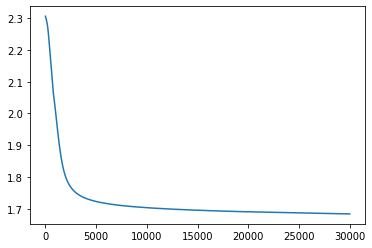

In [82]:
%time plt.plot(All_loss)

## 测试模型

In [83]:
x_test = tf.convert_to_tensor(x_test,dtype = tf.float32)/255.
y_test = tf.convert_to_tensor(y_test,dtype = tf.int32)
x_test = tf.reshape(x_test ,[-1,784]) #-1就是指任意多个

In [84]:
out3 = tf.nn.softmax(tf.nn.relu(tf.nn.relu(x_test@w1 +b1 ) @ w2 + b2) @ w3 + b3)
out3

<tf.Tensor: shape=(10000, 10), dtype=float32, numpy=
array([[1.2784282e-06, 5.6039142e-11, 4.2602059e-07, ..., 9.9994874e-01,
        6.4408362e-10, 5.5808431e-07],
       [3.6787133e-05, 6.3898042e-08, 9.9982649e-01, ..., 8.3725988e-14,
        5.9339621e-13, 4.0150126e-13],
       [7.1549225e-06, 9.9910176e-01, 3.2063463e-04, ..., 1.8684501e-04,
        3.6432382e-06, 5.8372920e-05],
       ...,
       [7.1653794e-08, 2.9509112e-10, 4.5537996e-09, ..., 4.9166970e-06,
        2.8419549e-09, 2.4720185e-04],
       [1.1303473e-03, 1.0502223e-02, 9.1634465e-06, ..., 6.0405193e-07,
        1.0764304e-06, 5.1595267e-05],
       [2.5698807e-08, 5.6748985e-14, 1.2612566e-06, ..., 3.4083368e-17,
        3.0616348e-14, 1.1822971e-13]], dtype=float32)>

In [85]:
y_predict = tf.math.argmax(out3,axis=-1)

In [86]:
y_predict,y_test

(<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([7, 2, 1, ..., 4, 6, 6], dtype=int64)>,
 <tf.Tensor: shape=(10000,), dtype=int32, numpy=array([7, 2, 1, ..., 4, 5, 6])>)

In [87]:
y_test = tf.cast(y_test,tf.int64) #强制转换

In [88]:
y_c=tf.math.equal(y_predict,y_test)
y_c

<tf.Tensor: shape=(10000,), dtype=bool, numpy=array([ True,  True,  True, ...,  True, False,  True])>

In [89]:
y_c = tf.cast(y_c,tf.int64)
y_c

<tf.Tensor: shape=(10000,), dtype=int64, numpy=array([1, 1, 1, ..., 1, 0, 1], dtype=int64)>

In [90]:
r = tf.math.reduce_sum(y_c) / 10000
r.numpy()

0.7782